# 1. Machine Learning Methods

In this notebook I'll be exploring the results of the following Machine Learning methods for our fraud detection problem using only their default settings:

* Logistic Regression
* Decision Tree
* Naive Bayes
* KNN

We'll be exploring how they compare against each other and these results will be used as a baseline to be compared against our better methods later

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedShuffleSplit, train_test_split, cross_val_score


import fraudutils as futils
import warnings

warnings.filterwarnings(action='once')

%load_ext autoreload
%autoreload 2
%matplotlib inline

Our data will be loaded and then splitted into train and test using 80/20 ratio.

In [2]:
cc_df = pd.read_csv('../../../data/raw/creditcard-fraud/creditcard.csv')
X_ = cc_df.drop(['Time', 'Class'], axis=1)
y_ = cc_df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=0, stratify=y_)

I'll be comparing classifiers the result of our classifiers applying undersampling and oversampling as shown bellow.

The metrics used below are accuracy, precision and recall, these are defined as:

$$Accuracy = \dfrac{TruePositive + TrueNegative}{TruePositive + FalsePositive + TrueNegative + FalseNegative}$$

$$Precision = \dfrac{TruePositive}{TruePositive + FalsePositive}$$

$$Recall = \dfrac{TruePositive}{TruePositive + TrueNegative}$$

In this analysis I'll be considering fraudulent examples as positives and non-fraudulents as negatives.

With the previous data split, we should have:

In [3]:
print("Train Data:")
print("Non-fraudulent: {}".format(len([x for x in y_train if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_train if x == 1])))

print("\nTest Data:")
print("Non-fraudulent: {}".format(len([x for x in y_test if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_test if x == 1])))

Train Data:
Non-fraudulent: 227451
Fraudulent: 394

Test Data:
Non-fraudulent: 56864
Fraudulent: 98


In [4]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, make_scorer, confusion_matrix, average_precision_score, roc_auc_score

scoring={'recall': make_scorer(recall_score),
         'precision': make_scorer(precision_score),
         'accuracy': make_scorer(accuracy_score),
         'aucpr': make_scorer(average_precision_score),
         'aucroc': make_scorer(roc_auc_score)}

In [5]:
c_scores = {}

### Running Classifiers

Logistic regression results:


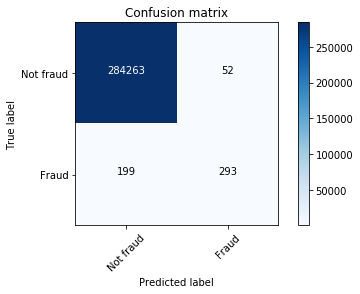

{'accuracy': 0.9991187008692917,
 'aucpr': 0.5095266411708497,
 'aucroc': 0.7976727798753181,
 'precision': 0.8694157220417998,
 'recall': 0.5955284552845528}

Decision tree results:


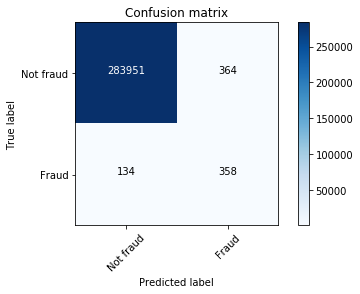

{'accuracy': 0.9982514494685734,
 'aucpr': 0.38644533646415447,
 'aucroc': 0.8631810044921475,
 'precision': 0.53370220422852,
 'recall': 0.7276422764227642}

Naive Bayes results:


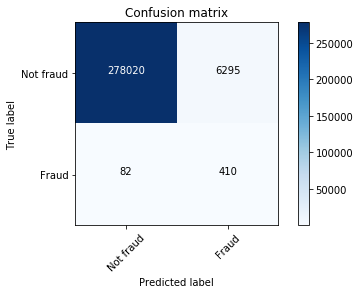

{'accuracy': 0.9776093983366411,
 'aucpr': 0.051285455396128984,
 'aucroc': 0.9055961989460948,
 'precision': 0.061262956981988755,
 'recall': 0.8333333333333334}

KNN results:


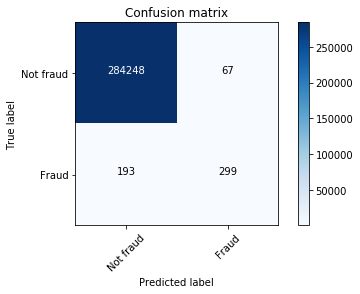

{'accuracy': 0.9990871012250976,
 'aucpr': 0.5005213395978345,
 'aucroc': 0.8037439618443978,
 'precision': 0.8313485980322975,
 'recall': 0.6077235772357724}


In [7]:
print("Logistic regression results:")
#c_scores['logistic_regression'] = futils.classify(X_train, X_test, y_train, y_test, classifier=LogisticRegression, normalized=False)
c_scores['logistic_regression'] = futils.stratified_crossvalidation(LogisticRegression, X=X_, y=y_, cv=3, scoring=scoring)
print("\nDecision tree results:")
#c_scores['decision_tree'] = futils.classify(X_train, X_test, y_train, y_test, classifier=DecisionTreeClassifier, normalized=False)
c_scores['decision_tree'] = futils.stratified_crossvalidation(DecisionTreeClassifier, X=X_, y=y_, cv=3, scoring=scoring)
print("\nNaive Bayes results:")
#c_scores['naive_bayes'] = futils.classify(X_train, X_test, y_train, y_test, classifier=GaussianNB, normalized=False)
c_scores['naive_bayes'] = futils.stratified_crossvalidation(GaussianNB, X=X_, y=y_, cv=3, scoring=scoring)
print("\nKNN results:")
#c_scores['knn'] = futils.classify(X_train, X_test, y_train, y_test, classifier=KNeighborsClassifier, normalized=False)
c_scores['knn'] = futils.stratified_crossvalidation(KNeighborsClassifier, X=X_, y=y_, cv=3, scoring=scoring)

## Scores

In [8]:
scores = pd.DataFrame(c_scores)
scores

,logistic_regression,decision_tree,naive_bayes,knn
accuracy,0.999119,0.998251,0.977609,0.999087
aucpr,0.509527,0.386445,0.051285,0.500521
aucroc,0.797673,0.863181,0.905596,0.803744
precision,0.869416,0.533702,0.061263,0.831349
recall,0.595528,0.727642,0.833333,0.607724
